# Linear Support Vector Machines: Hard vs Soft Margin

## Objective
Understand how SVMs classify data by maximizing the margin and how
the soft-margin formulation handles noisy and non-separable data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [2]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42,
)

y = np.where(y == 0, -1, 1)

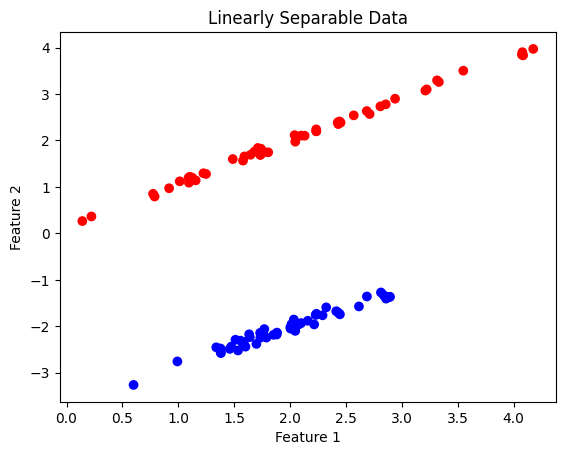

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Data")
plt.show()


In [4]:
hard_svm = SVC(kernel="linear", C=1e6)
hard_svm.fit(X, y)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1000000.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [7]:
def plot_svm_decision_boundary(model, X, y):
    w = model.coef_[0]
    b = model.intercept_[0]

    x0 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)
    x1 = -(w[0] * x0 + b) / w[1]

    margin = 1 / np.linalg.norm(w)
    x1_up = x1 + margin
    x1_down = x1 - margin

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
    plt.plot(x0, x1, "k-", label="Decision boundary")
    plt.plot(x0, x1_up, "k--")
    plt.plot(x0, x1_down, "k--")
    plt.legend()
    plt.show()


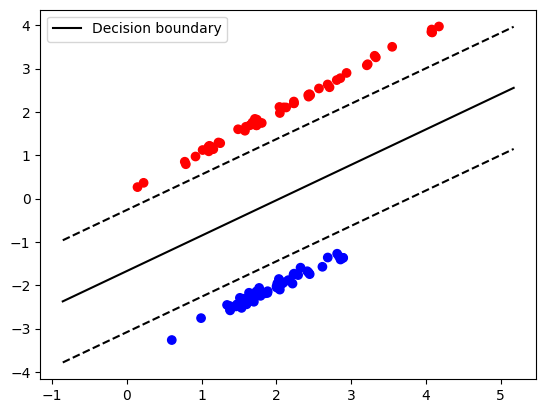

In [8]:
plot_svm_decision_boundary(hard_svm, X, y,)


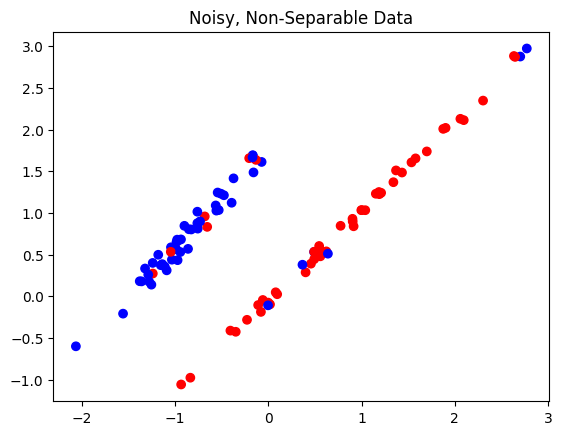

In [9]:
X_noisy, y_noisy = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=0.8,
    flip_y=0.1,
    random_state=42
)

y_noisy = np.where(y_noisy == 0, -1, 1)

plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap="bwr")
plt.title("Noisy, Non-Separable Data")
plt.show()

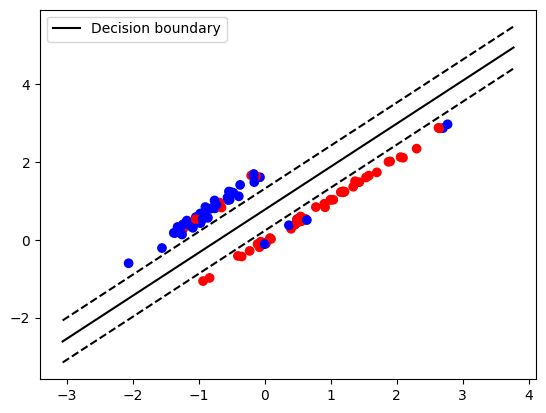

In [10]:
soft_svm = SVC(kernel="linear", C=1.0)
soft_svm.fit(X_noisy, y_noisy)

plot_svm_decision_boundary(soft_svm, X_noisy, y_noisy)

In [11]:
def plot_svm_decision_boundary(model, X, y, ax):
    w = model.coef_[0]
    b = model.intercept_[0]

    x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
    x1 = -(w[0] * x0 + b) / w[1]

    margin = 1 / np.linalg.norm(w)
    x1_up = x1 + margin
    x1_down = x1 - margin

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
    ax.plot(x0, x1, "k-", label="Decision boundary")
    ax.plot(x0, x1_up, "k--")
    ax.plot(x0, x1_down, "k--")

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")


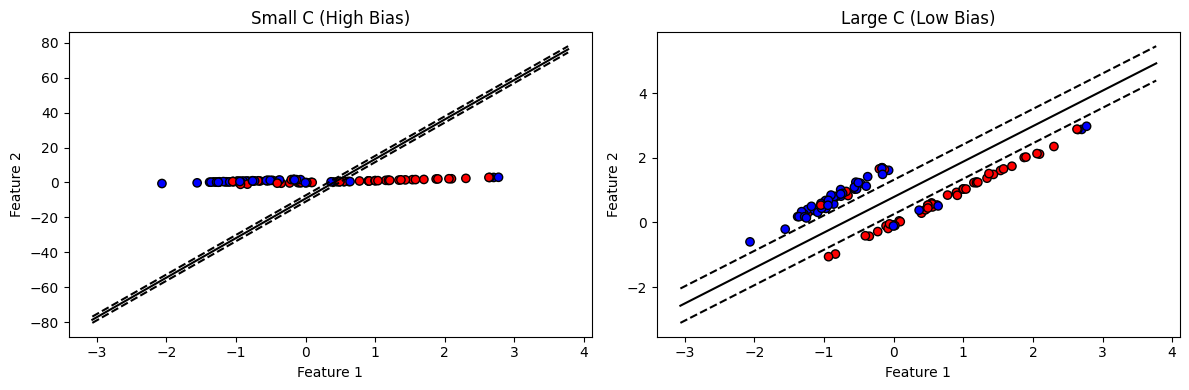

In [13]:
svm_low_C = SVC(kernel="linear", C=0.01)
svm_high_C = SVC(kernel="linear", C=100)

svm_low_C.fit(X_noisy, y_noisy)
svm_high_C.fit(X_noisy, y_noisy)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_svm_decision_boundary(svm_low_C, X_noisy, y_noisy, axes[0])
axes[0].set_title("Small C (High Bias)")

plot_svm_decision_boundary(svm_high_C, X_noisy, y_noisy, axes[1])
axes[1].set_title("Large C (Low Bias)")

plt.tight_layout()
plt.show()


### Interpretation

Reducing the value of C increases the margin width and allows more
classification errors, resulting in a smoother and more robust boundary.
Increasing C forces the model to fit the training data more strictly,
making it sensitive to outliers.


## Key Takeaways

- Hard-margin SVM assumes perfect separability
- Soft-margin SVM allows controlled violations
- The parameter C controls bias–variance tradeoff
- SVM regularization is geometric, not probabilistic